Assumptions:
1. User have similar rating in past will have similar rating in future.
2. For computing pearson similarity we consider only the rating which user 1 and user 2 both has value. If either of it is not available like "Nan" value that rating is not considered.


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np

 **part 1  -  Importing data**

In [ ]:
#u.data file has all the data needed which is in .data format. This u.data file has 100000 ratings by 943 users on 1682 items.
# structure of data -<  user id | item id | rating | timestamp

#creating meaning full names for each column
column_names=["user_id", "item_id",  "rating", "timestamp"]

#pd.read_table -> uses pandas library to import the u.data files data in a table format. Since the data itself hadnt any header it is specified as "None".
df=pd.read_table('u.data',header=None,names=column_names)


#to print the top 5 row vales from the data .head() function is used.
df.head()

#len() function is used to print the total number f rows in the dataset which is imported in variable called 'df'.
print(len(df))

100000


In [ ]:
#dropping 'timestamp' column from the data which is not required in this case.
df = df.drop("timestamp", axis=1)

#creating a user-item matrix with user-id's in rows index and item-ids in column and rating in the cell values.
user_item_matrix = df.pivot(index="user_id", columns="item_id", values="rating")

#replacing 0 for Nan values
#user_item_matrix.fillna(0,inplace=True)

#printing first few rows
user_item_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
col_names = {
    "item": ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western'],
    "user": ['user id' , 'age' , 'gender' , 'occupation' , 'zip code']
}


In [ ]:
movies = pd.read_table('u.item', header = None, sep='|', names = col_names["item"],  encoding='latin-1')
movies.head(5)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
users = pd.read_table('u.user', header = None, sep='|', names = col_names["user"],  encoding='utf-8')
users.head(5)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


**Part 2 - Pearson correlation function**

In [ ]:
#PEARSON SIMILARITY FUNCTION MANUAL IMPLEMENTATION

def pearson_correlation_computed_function(target_user, user2):
    # Find common items rated by both users
    common_items = (user_item_matrix.loc[target_user].dropna().index).intersection(user_item_matrix.loc[user2].dropna().index)
    if len(common_items) == 0:
        return 0  # No common items, so correlation is 0

    # Extract the ratings for the common items
    #r(a,p)
    user1_ratings = [user_item_matrix.loc[target_user][i] for i in common_items]
    #r(b,p)
    user2_ratings = [user_item_matrix.loc[user2][i] for i in common_items]

    # Calculate the mean ratings for both users
    # mean(r_a)
    mean_user1 = np.mean(user1_ratings)
    #  mean(r_b)
    mean_user2 = np.mean(user2_ratings)

    # Calculate the numerator and denominators for Pearson correlation
    # (Σp[(r(a,p) - mean(r_a)) * (r(b,p) - mean(r_b)]) for every p belongs to set "P" - which has common ratings from target user as well as user in consideration.
    numerator = sum((user1_ratings[i] - mean_user1) * (user2_ratings[i] - mean_user2) for i in range(len(common_items)))
    #  [√(Σ(r(a,p) - mean(r_a)² * √(Σ(r(b,p) - mean(r_b)²)]
    denominator_user1 = np.sqrt(sum((user1_ratings[i] - mean_user1) ** 2 for i in range(len(common_items))))
    denominator_user2 = np.sqrt(sum((user2_ratings[i] - mean_user2) ** 2 for i in range(len(common_items))))

    # Calculate the Pearson correlation coefficient
    if denominator_user1 == 0 or denominator_user2 == 0:
        return 0  # Handle division by zero
    else:
       #pearson correlation = (Σp[(r(a,p) - mean(r_a)) * (r(b,p) - mean(r_b)])/ [√(Σ(r(a,p) - mean(r_a)² * √(Σ(r(b,p) - mean(r_b)²)]
        correlation = numerator / (denominator_user1 * denominator_user2)
        return correlation

#pearson_similarity = pearson_correlation(user1, user2)
#print(f"Pearson Correlation: {pearson_similarity}")



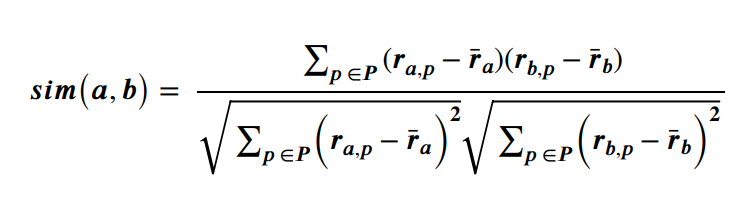

In [ ]:
#calls manually defined pearson function iteratively to compute similarity for all the user 942 users exlusing the target user.
import math
#parameter explanation - (target_user) -> user for whom the recommendation is required, (num_users) -> consider num_users as a int n it is like returning top n closely similar user to the user in target.
def find_similar_users_with_compute_pearson(target_user, num_users):
    similarities = {}
    #iterating over each user in the user-item matrix
    for user in user_item_matrix.index:
        #condition to skip when the current user in the iteration is equal to the target user. Since we dont want to compute pearson similarity for a target user user the target user himself.
        if user != target_user:
            #computing similarity for target user eg:Alice with other user eg:user1(increased like user2, user3 till users 943 one by one) using predefined pearson function
            #similarity = pearson_correlation_predefined(target_user, user)
            #computing similarity for target user eg:Alice with other user eg:user1(increased like user2, user3 till users 943 one by one) using formula based computed pearson function
            similarity = pearson_correlation_computed_function(target_user, user)
            #similarities are stored in this array called "similarities" with respect to each user_id as as its index. Eg: similarity[102] gives the similarity value between the target user and the user 102.
            similarities[user] = similarity
    #filtered_similarity = {k: v for k, v in similarities.items() if not isinstance(v, float) or not math.isnan(v)}
    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:num_users]

In [ ]:
#test manually computed pearson function
similar_users=find_similar_users_with_compute_pearson(930, num_users=10)
print("Top 10 similar users to User 930:")
for user, similarity in similar_users:
    print(f"User {user}, Similarity: {round(similarity,15)}")

Top 10 similar users to User 930:
User 205, Similarity: 1.0
User 842, Similarity: 1.0
User 111, Similarity: 1.0
User 142, Similarity: 1.0
User 575, Similarity: 1.0
User 604, Similarity: 1.0
User 626, Similarity: 1.0
User 641, Similarity: 1.0
User 810, Similarity: 0.984731927834662
User 47, Similarity: 0.981980506061966


In [ ]:
# PREDEFINED PEARSON CORRELATION FUNCTION

#importing pearson correlation fuction from scipy
from scipy.stats import pearsonr

#defining a manual function which calls the predefined pearsonr function.
def pearson_correlation_predefined(target_user, user2):
    #Since there are many Nan values in the data set consider only the common ratings which both the user has
    common_items = (user_item_matrix.loc[target_user].dropna().index).intersection(user_item_matrix.loc[user2].dropna().index)

    if len(common_items)<=2:
        return 0
    #print(user_item_matrix.loc[target_user][common_items])
    return pearsonr(user_item_matrix.loc[target_user][common_items], user_item_matrix.loc[user2][common_items])[0]

In [ ]:
#calls predefined pearson function iteratively to compute similarity for all the user 942 users exlusing the target user.

import math
#parameter explanation - (target_user) -> user for whom the recommendation is required, (num_users) -> consider num_users as a int n it is like returning top n closely similar user to the user in target.
def find_similar_users_prebuilt_pearson(target_user, num_users):
    similarities = {}
    #iterating over each user in the user-item matrix
    for user in user_item_matrix.index:
        #condition to skip when the current user in the iteration is equal to the target user. Since we dont want to compute pearson similarity for a target user user the target user himself.
        if user != target_user:
            #computing similarity for target user eg:Alice with other user eg:user1(increased like user2, user3 till users 943 one by one) using predefined pearson function
            similarity = pearson_correlation_predefined(target_user, user)
            #similarities are stored in this array called "similarities" with respect to each user_id as as its index. Eg: similarity[102] gives the similarity value between the target user and the user 102.
            similarities[user] = similarity
    filtered_similarity = {k: v for k, v in similarities.items() if not isinstance(v, float) or not math.isnan(v)}
    return sorted(filtered_similarity.items(), key=lambda x: x[1], reverse=True)[:num_users]

In [ ]:
#test predefined pearson function
similar_users=find_similar_users_prebuilt_pearson(930, num_users=10)
print("Top 10 similar users to User 930:")
for user, similarity in similar_users:
    print(f"User {user}, Similarity: {round(similarity,15)}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Top 10 similar users to User 930:
User 205, Similarity: 1.0
User 810, Similarity: 0.984731927834662
User 47, Similarity: 0.981980506061966
User 681, Similarity: 0.970725343394151
User 171, Similarity: 0.968245836551854
User 544, Similarity: 0.944911182523068
User 170, Similarity: 0.944911182523068
User 258, Similarity: 0.944610428530781
User 34, Similarity: 0.927172649945531
User 165, Similarity: 0.927172649945531


**Part 3 - Prediction function**

In [ ]:
#PREDICTION FUNCTION GIVEN IN CLASS

import math
def prediction_funciton_inclass(targetUser,movie,pearsonResult):
    #defining how many neighbors should be considered for predicting movie rating
    #num_users=100
    #pearsonResult=find_similar_users_with_compute_pearson(targetUser, num_users)

    #similar users and their corresponding similarity values for top 100 users are computed and stored.
    #finding out of these similar users which users has the rated value for movie which the prediction should be done to the target user. Eg: if movie number 101 for the arget user needs to be prediction even from the top 100 similar user to the target user is considered entirely. We should implement a filter which filters only the user which has rating for this secific movie.
    similarUsers=[item[0] for item in pearsonResult]
    similarUserWithRating=[]
    for i in similarUsers:
      if(not math.isnan(user_item_matrix.loc[i][movie])):
        #print(user_item_matrix.loc[i][movie])
        similarUserWithRating.append(i)
    filteredPearsonResult=[]
    for item in pearsonResult:
      if item[0] in similarUserWithRating:
        filteredPearsonResult.append(item)

    #compute mean(r_a)
    availableRatingInA=[]
    #filtering out rating in A which is the target user where rating in not "NaN"
    for i in range(1,len(user_item_matrix.loc[targetUser])):
      if(not math.isnan(user_item_matrix.loc[targetUser][i])):
        availableRatingInA.append(user_item_matrix.loc[targetUser][i])
    meanRA=np.mean(availableRatingInA)
    #print(meanRA)

    #compute rest of the formula
    numer=0
    denom=0

    for simUser,simAB in filteredPearsonResult:
      common_items = (user_item_matrix.loc[targetUser].dropna().index).intersection(user_item_matrix.loc[simUser].dropna().index)
      if len(common_items) == 0:
          return 0  # No common items, so correlation is 0

      # Extract the ratings for the common items
      #r(b,p)
      rb_ratings = [user_item_matrix.loc[simUser][i] for i in common_items]

      # Calculate the mean ratings for both user
      #  mean(r_b)
      meanRB = np.mean(rb_ratings)

      #curret users movie rating for the speific movie in prediction
      Rbp=user_item_matrix.loc[simUser][movie]

      #computes the numerator part of the given predictor function (sum(sim(a,b)*(rbp-mean(r_b)))
      cal=(simAB*(Rbp-meanRB))
      numer+=cal
      #computes the denominator part of the given predictor function (sum(sim(a,b)))
      denom+=simAB

    #final computation of the predictor function
    #pred(a,p)=mean(r_a)+(sum(sim(a,b)*(rbp-mean(r_b)))/(sum(sim(a,b)))
    return meanRA+(numer/denom)



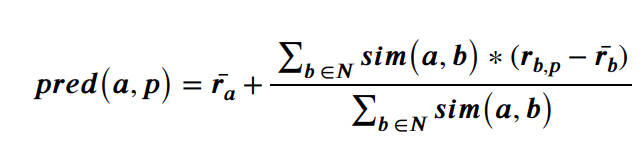

In [ ]:
#DIFFERENT PREDICTION FUNCTION
def predict_movie_score(user, movie, similar_users):
    weighted_sum = 0
    similarity_sum = 0
    for similar_user, similarity in similar_users:
        if not pd.isna(user_item_matrix.loc[similar_user, movie]):
            weighted_sum += similarity * user_item_matrix.loc[similar_user, movie]
            similarity_sum += abs(similarity)
    if similarity_sum == 0:
        return 0
    return weighted_sum / similarity_sum

In [ ]:
#predicting for user 2 rating for movie 9
similar_users = find_similar_users_with_compute_pearson(2, num_users=100)
pred_AP = prediction_funciton_inclass(2,9,similar_users)
print("For the user 2 the rating prediction for the movie 9 using the prediction function said in class is",pred_AP)

For the user 2 the rating prediction for the movie 9 using the prediction function said in class is 3.8811963467313015


In [ ]:
#predicting for user 2 rating for movie 9
similar_users = find_similar_users_with_compute_pearson(2, num_users=100)
pred_AP = predict_movie_score(2,9,similar_users)
print("For the user 2 the rating prediction for the movie 9 using different prediction function is",pred_AP)

For the user 2 the rating prediction for the movie 9 using different prediction function is 3.9891932611573764


The prediction function implemented using the formula given in class given a rating of **3.88** to movie 9 for user 2. And the random prediction function taken from chatgpt produces for the same input **3.98** which is pretty close to each other and also confirms that the way We implemented the formula presented in class is correct.

**Part 4 - Select a user and give 10 similar users and 10 similar movies**

Top 10 Similar users

In [ ]:
#Using computed pearson function for finding similar 10 users
similar_users_formula_pearson = find_similar_users_with_compute_pearson(943, num_users=10)
print("Top 10 similar users to User 943:")
for user, similarity in similar_users_formula_pearson:
    print(f"User {user}, Similarity: {similarity}")

Top 10 similar users to User 943:
User 558, Similarity: 1.0
User 782, Similarity: 1.0
User 832, Similarity: 1.0
User 594, Similarity: 0.9999999999999998
User 662, Similarity: 0.9999999999999998
User 857, Similarity: 0.9999999999999998
User 520, Similarity: 0.928571428571429
User 9, Similarity: 0.9271726499455306
User 369, Similarity: 0.9185586535436919
User 464, Similarity: 0.9185586535436917


In [ ]:
#Using predefined pearson function for finding similar 10 users
similar_users = find_similar_users_prebuilt_pearson(943, num_users=10)
print("Top 10 similar users to User 943:")
for user, similarity in similar_users:
    print(f"User {user}, Similarity: {similarity}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Top 10 similar users to User 943:
User 558, Similarity: 1.0
User 594, Similarity: 1.0
User 832, Similarity: 0.9999999999999999
User 782, Similarity: 0.9999999999999998
User 520, Similarity: 0.9285714285714284
User 9, Similarity: 0.9271726499455306
User 464, Similarity: 0.9185586535436919
User 369, Similarity: 0.9185586535436918
User 415, Similarity: 0.8807048459279793
User 139, Similarity: 0.875


Top 10 Recommended movies

In [ ]:
#finding similar movies
from collections import defaultdict
targetUser=943
user_ratings = user_item_matrix.loc[user]
movie_recommendations = defaultdict(float)
similar_users = find_similar_users_with_compute_pearson(targetUser, num_users=10)
for movie in user_item_matrix.columns:
    if pd.isna(user_ratings[movie]) or user_ratings[movie] == 0:
        predicted_rating = predict_movie_score(1, movie,similar_users)
        movie_recommendations[movie] = predicted_rating

top_recommendations = sorted(movie_recommendations.items(), key=lambda x: x[1], reverse=True)[:10]
print(f"10 most relevant movie recommendations for User :",targetUser)
for movie, rating in top_recommendations:
    print(f"Movie Name: {movies.loc[movie][1]}, Movie ID: {movie}, Predicted Rating: {rating:.2f}, Release Date: {movies.loc[movie][2]}")

10 most relevant movie recommendations for User : 943
Movie Name: English Patient, The (1996), Movie ID: 285, Predicted Rating: 5.00, Release Date: 15-Nov-1996
Movie Name: Twelve Monkeys (1995), Movie ID: 6, Predicted Rating: 5.00, Release Date: 01-Jan-1995
Movie Name: Mighty Aphrodite (1995), Movie ID: 12, Predicted Rating: 5.00, Release Date: 30-Oct-1995
Movie Name: Home Alone (1990), Movie ID: 93, Predicted Rating: 5.00, Release Date: 01-Jan-1990
Movie Name: Haunted World of Edward D. Wood Jr., The (1995), Movie ID: 114, Predicted Rating: 5.00, Release Date: 26-Apr-1996
Movie Name: Princess Bride, The (1987), Movie ID: 172, Predicted Rating: 5.00, Release Date: 01-Jan-1987
Movie Name: Terminator, The (1984), Movie ID: 194, Predicted Rating: 5.00, Release Date: 01-Jan-1984
Movie Name: Graduate, The (1967), Movie ID: 196, Predicted Rating: 5.00, Release Date: 01-Jan-1967
Movie Name: Groundhog Day (1993), Movie ID: 201, Predicted Rating: 5.00, Release Date: 01-Jan-1993
Movie Name: Heat

**Part 5 - Other Similarity function**

Cosine Similarity Function:
1. It handle high-dimensional data well.
2. When the data is sparse in a high-dimensional vector it can be handled efficiently by this. In our case the we have 1682 movies so the dimension of the vector is 1*1682 amon this we hardly have 20 ratings other than that its is "Nan" so cosine similarity function can handle it effectively.
3. It also works well with data which has limited dynamic range. In our case the range is 1 to 5 for ratings.

In [ ]:
#IMPLEMENTING COSINE SIMILARITY FUNTION

# Calculate cosine similarity between users
def cosine_similarity(targetUser, user2):
    # Find common items rated by both users
    common_items = (user_item_matrix.loc[targetUser].dropna().index).intersection(user_item_matrix.loc[user2].dropna().index)
    if len(common_items) == 0:
        return 0

    #computing cosine similarity
    #taking dot product for user ratings and user 2 ratings
    dot_product = np.dot(user_item_matrix.loc[targetUser][common_items], user_item_matrix.loc[user2][common_items])
    #print("Dot product ",dot_product)
    #L2 norm of target user rating vector is computed
    norm_targetUser = np.linalg.norm(user_item_matrix.loc[targetUser][common_items])
    #print("norm_targetUser ", norm_targetUser)
    #L2 norm of user2 rating vector is computed
    norm_user2 = np.linalg.norm(user_item_matrix.loc[user2][common_items])
    #print("norm_user2 ",norm_user2)

    if norm_targetUser == 0 or norm_user2 == 0:
        return 0  # Handle the case of zero vector (division by zero)

    similarity = dot_product / (norm_targetUser * norm_user2)
    return similarity


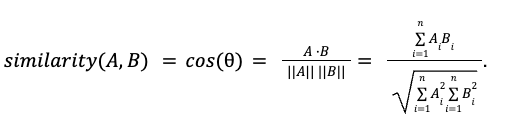

In [ ]:
def find_similar_users_using_cosine(target_user, num_users):
    similarities = {}
    #iterating over each user in the user-item matrix
    for user in user_item_matrix.index:
        #condition to skip when the current user in the iteration is equal to the target user. Since we dont want to compute pearson similarity for a target user user the target user himself.
        if user != target_user:
            #computing similarity for target user eg:Alice with other user eg:user1(increased like user2, user3 till users 943 one by one) using predefined pearson function
            similarity = cosine_similarity(target_user, user)
            similarities[user] = similarity
    filtered_similarity = {k: v for k, v in similarities.items() if not isinstance(v, float) or not math.isnan(v)}
    return sorted(filtered_similarity.items(), key=lambda x: x[1], reverse=True)[:num_users]

In [ ]:
find_similar_users_using_cosine(930, num_users=15)

[(35, 1.0),
 (208, 1.0),
 (219, 1.0),
 (302, 1.0),
 (319, 1.0),
 (341, 1.0),
 (366, 1.0),
 (369, 1.0),
 (519, 1.0),
 (547, 1.0),
 (688, 1.0),
 (111, 0.9995120760870788),
 (205, 0.9988907373180402),
 (31, 0.9949366763261821),
 (644, 0.9938619119223031)]

In [ ]:
print(movies.loc[0][2])

01-Jan-1995
